<a href="https://colab.research.google.com/github/byslavam/MAT422/blob/main/4_2_Spectral_Graph_Bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.2 Spectral Graph Bipartitioning**
**Graph partition** aims to find out a partition such that the cut (the total
number of edges between two disjoint sets of nodes) is minimized.

$cut(V_1,V_2) = Σ_{i∈V_ij∈V_2}M_{ij}$

## Raleigh Quotient
The Raleigh Quotient is a measure of how well a graph can be bipartitioned. The Raleigh Quotient can be defined as:

$R(p) = \frac{p^TLp}{p^Tp}=\frac{1}{n}*4cut(V_1,V_2)$

where:


*   $L$ is the lapacian matrix
*   $p$ is the partition vector

## Balancing the Cut
In partical applications, the balanced cut represents a special graph partitioning where the two sets are of equal size and the number of edges between the two sets is minimized.

The balanced cut can be found by minimizing the Raleigh Quotient:
$Q(V_1,V_2) = \frac{cut(V_1,V_2)}{Wv_1}+\frac{cut(V_1,V_2)}{Wv_2}$

### Ratio and Normalized Cut
#### Ratio Cut
The Ratio-cut objective function is defined as:

$Ratio-cut(V_1,V_2) = p(S) = \frac{cut(V_1,V_2)}{|v_1|}+\frac{cut(V_1,V_2)}{|v_2|}$

#### Normalized Cut
The normalized-cut objective fucntion is defined as:
$Normalized-cut(V_1,V_2) = ŋ(S) = \frac{cut(V_1,V_2)}{Σ_{i∈v_1}w_{ii}}+\frac{cut(V_1,V_2)}{Σ_{i∈v_2}w_{ii}} = 2 - S(V_1,V_2)$ where $S(V_1,V_2) = \frac{within(V_1,V_2)}{Σ_{i∈v_1}w_{ii}}+\frac{within(V_1,V_2)}{Σ_{i∈v_2}w_{ii}}$ where $within(V_i)=Σ_{j∈V_i}w_{ij}$.





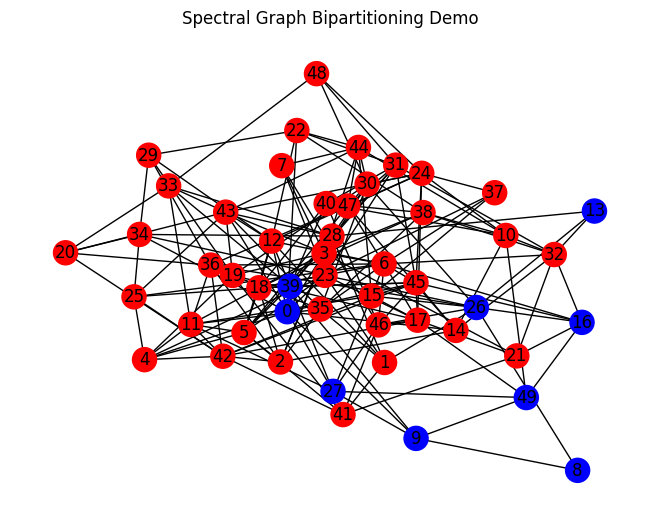

In [1]:
# Demo
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def spectral_bipartitioning_demo():
    # Generate a random graph
    graph = nx.erdos_renyi_graph(50, 0.15)

    # Compute the Laplacian matrix
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

    # Get the second smallest eigenvector (Fiedler vector)
    fiedler_vector = eigenvectors[:, 1]

    # Partition the nodes based on the sign of the Fiedler vector
    partition_1 = [node for node, value in enumerate(fiedler_vector) if value >= 0]
    partition_2 = [node for node, value in enumerate(fiedler_vector) if value < 0]

    # Visualize the graph and the bipartitioning
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color=['b' if node in partition_1 else 'r' for node in graph.nodes()])
    plt.title("Spectral Graph Bipartitioning Demo")
    plt.show()

# Run the demo
spectral_bipartitioning_demo()